## Code demonstrating translation from electron density to smiles

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"
import tensorflow as tf
import rdkit
os.chdir('/home/jarek/electrondensity2')
from input.tfrecords import input_fn
from input.tokenizer import Tokenizer
from ed2smiles import E2S, generate_from_file

In [2]:
tokenizer = Tokenizer('/home/jarek/electrondensity2/data/ed2smiles_tokenizer.json')

In [3]:
model = E2S(num_outputs=33, lstm_dim=512)
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
checkpoint = tf.train.Checkpoint(optimizer=optimizer, model=model)
checkpoint.restore('/media/group/d22cc883-8622-4ecd-8e46-e3b0850bb89a2/jarek/ed2smiles/ed2smiles.ckpt-72')

In [4]:
# open one of the genereated electron densities
smiles = generate_from_file('sample_eds.pkl',index=0, model=model, tokenizer=tokenizer)

RDKit ERROR: [12:41:01] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9
RDKit ERROR: 
RDKit ERROR: [12:41:01] Explicit valence for atom # 7 N, 4, is greater than permitted


In [5]:
smiles

['CCC1N=CN(C)C1=O',
 'CCC1OC12CC(=O)C2',
 'CC1OC2=NC(C)CC21',
 'COC1CC12C=CCO2',
 'COCC1OC2CC2O1',
 'CCC1OC12C=CCO2',
 'CNC(=O)C1CC(C)O1',
 'CCN1CC1C(=O)CO',
 'CCC1OC12CCC2=O',
 'CCN1CC1C(=O)CO',
 'COCC1OC(C)C1=O',
 'CNC1CN2C(=O)CC12',
 'COC1C=C2CCC2O1',
 'CNC1CN(C)C(=N)O1',
 'CNC(=O)C1OC1(C)C',
 'CCC1OC12CNC2=N',
 'COC1CN(C2CC2)O1',
 'CCC1OC12CCC2=O',
 'CCN1CC1c1nccn1',
 'CCC1OC(=N)C1OC',
 'COC1CC2C(=N)NC12',
 'CCC1OC2C(=N)NC12',
 'CC1COC(=NC)CO1',
 'COC1OC12C=CCC2',
 'CCC1N=CN(C)C1=O',
 'CCC1OC12CC(=O)C2',
 'CCN1CC1C1OC1',
 'CC1CC2C(=NC)N2=N1',
 'CCC1OC12C=CCO2',
 'CNC1=NCC2(CC2)O1',
 'CCC1OC12CCC2=O',
 'CNC1COC1OC']

## Let's see the results

RDKit ERROR: [12:41:12] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9
RDKit ERROR: 
RDKit ERROR: [12:41:12] Explicit valence for atom # 7 N, 4, is greater than permitted


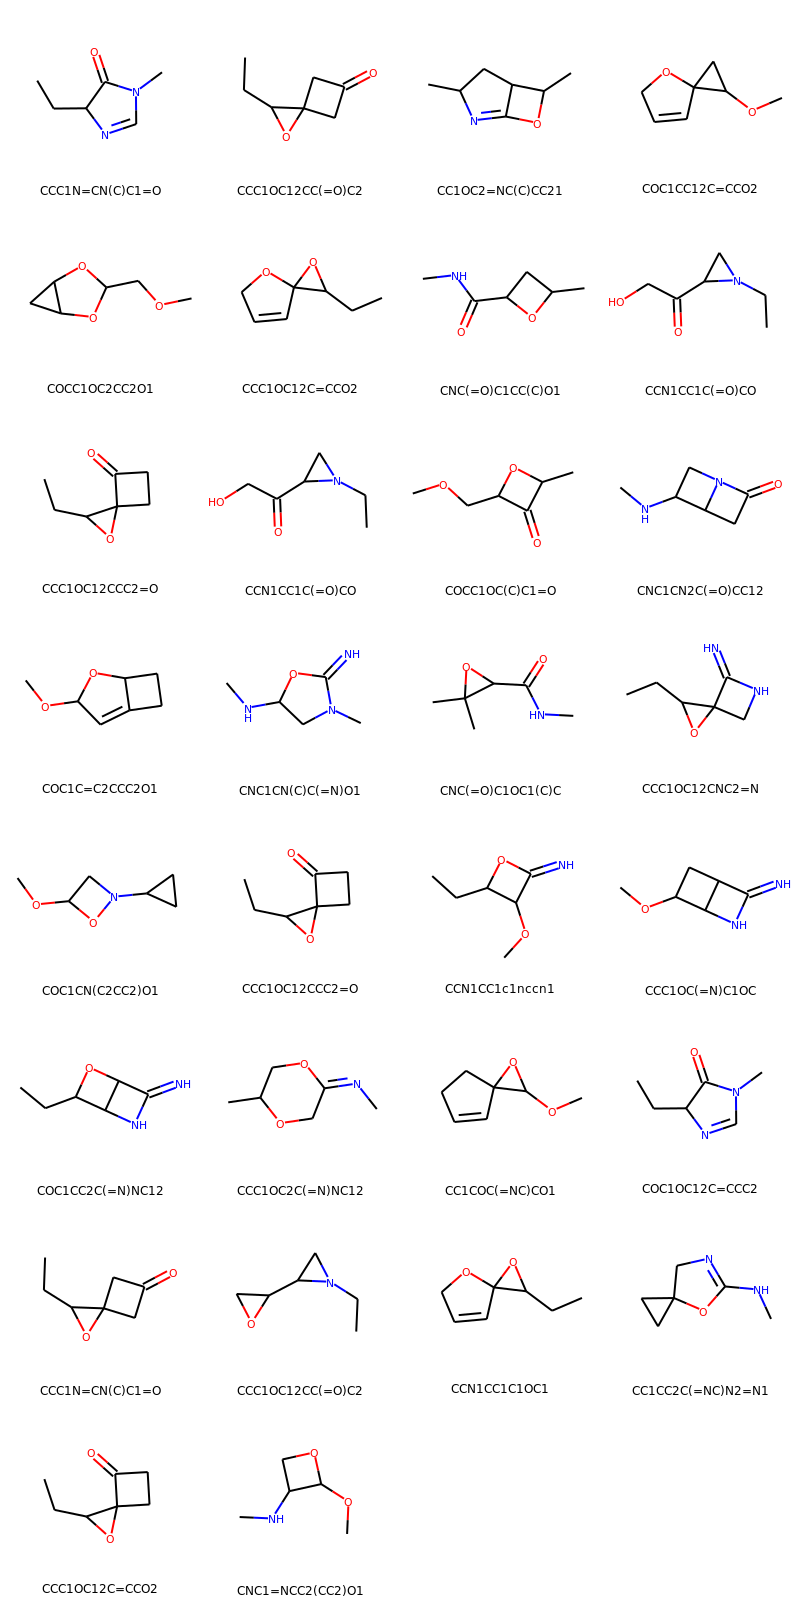

In [6]:
mols = [rdkit.Chem.MolFromSmiles(m) for m in smiles]
mols = [mol for mol in mols if mol is not None]
rdkit.Chem.Draw.MolsToGridImage(mols,molsPerRow=4,subImgSize=(200,200),
                                   legends=smiles)